# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.081866e+01     7.929197e+00
 * time: 0.0017352104187011719
     1     2.899511e+01     5.685124e+00
 * time: 0.006392002105712891
     2     2.110967e+01     5.566193e+00
 * time: 0.01100611686706543
     3     1.501754e+01     4.702317e+00
 * time: 0.015377044677734375
     4     1.161022e+01     1.931586e+00
 * time: 0.019561052322387695
     5     1.078326e+01     2.663445e+00
 * time: 0.022933006286621094
     6     1.005443e+01     1.443131e+00
 * time: 0.027363061904907227
     7     9.482408e+00     1.806404e+00
 * time: 0.03125309944152832
     8     9.000920e+00     1.740912e+00
 * time: 0.034970998764038086
     9     8.681105e+00     9.539301e-01
 * time: 0.04012703895568848
    10     8.491481e+00     8.683994e-01
 * time: 0.04617500305175781
    11     8.359198e+00     7.723312e-01
 * time: 0.052178144454956055
    12     8.230768e+00     6.878828e-01
 * time: 0.05711007118225098
    13     8.209335e+00     1.030244e+00

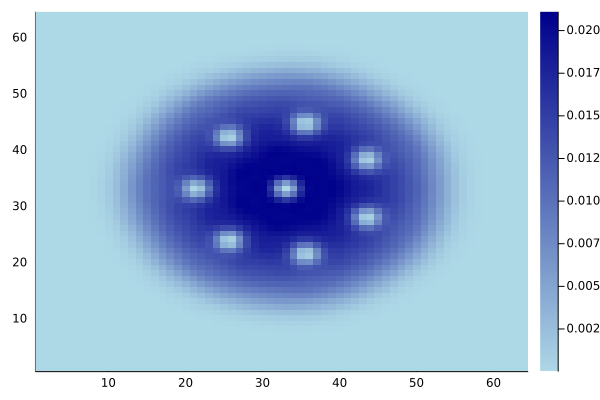

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)